In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

## Логистическая регрессия

Рассмотрим логистическую регрессию на примере набора данных цветов ириса.

Для простоты будем использовать только два признака Sepal Width и Sepal Length, а также два класса Setosa и Versicolor.

Итак, наша задача построить разделяющую границу (decision boundary), которая бы позволила нам отделить наблюдения одного класса (Setosa) от другого (Versicolor).
представим зависимую переменную в виде линейной комбинации признаков (по аналогии с линейной регрессией)

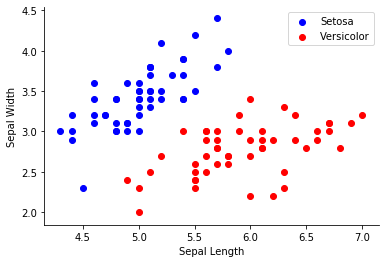

In [2]:
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

Итак, наша задача построить разделяющую границу (decision boundary), которая бы позволила нам отделить наблюдения одного класса (Setosa) от другого (Versicolor). Одним из напрашиваемых решений является представление зависимой переменной в виде линейной комбинации признаков (по аналогии с линейной регрессией):

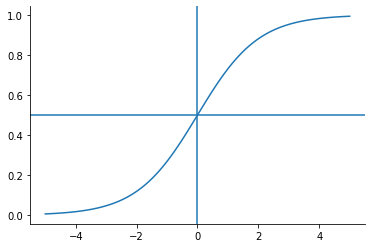

In [3]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

## Пример с использованием библиотеки sklearn

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
sum(y_test == y_pred)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


30

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

Рассмотрим другой пример, для которого сгенеируем набор данных из 10 тысяч наблюдений:

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\123\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
 sum(y_test == y_pred)

2306

In [8]:
accuracy_score(y_test, y_pred)

0.7686666666666667

Значение 0.7687 ничего не говорит нам об ошибках первого и второго рода. Мы можем построить матрицу ошибок C, чтобы получить более полное представление.

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
confusion_matrix(y_test, y_pred)

array([[1129,  363],
       [ 331, 1177]], dtype=int64)

# Задание

In [11]:
class LogisticRegression:
    def __init__(self, alpha=0.001, max_iter=5000):
        self.alpha = alpha
        self.max_iter = max_iter

    def fit(self, X_train, y_train):  # Обучение и тренировка модели
        m = y_train.size
        X = X_train.copy()
        X = np.insert(X, 0, 1, axis=1)
        t = X.T
        theta = np.zeros(X.shape[1])

        for n in range(self.max_iter):
            z = np.dot(theta, t)
            sigma = 1 / (1 + np.exp(-z))
            theta -= self.alpha * (1 / m) * np.dot((sigma - y_train), X)

        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

        return self.coef_, self.intercept_

    def predict(self, X_test):  # Возвращение прогнозов для новых данных
        pred = []
        for i in range(len(X_test)):
            z = self.intercept_ + np.sum(X_test[i] * self.coef_)
            sigma = 1 / (1 + np.exp(-z))

            if sigma >= 0.5:
                pred.append(1)
            else:
                pred.append(0)

        return pred

    def predict_proba(self, X_test):
        return [(1 / (1 + np.exp(-(self.intercept_ + np.sum(X_test[i] * self.coef_)))), 1 - 1 / (1 + np.exp(-(self.intercept_ + np.sum(X_test[i] * self.coef_))))) for i in range(len(X_test))]


In [12]:
iris = pd.DataFrame(data=data.data, columns=data.feature_names)

In [13]:
iris = iris.drop("petal length (cm)", axis=1)

In [14]:
iris = iris.drop("petal width (cm)", axis=1)

In [15]:
iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


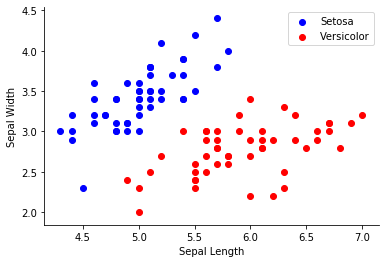

In [16]:
X = data.data[:100, :2]
y = data.target[:100]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor")) # Разделяющая граница одного класса от другого
sns.despine()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

(array([ 0.52684561, -0.88058947]), -0.10475714558544347)

In [20]:
ans = model.predict(X_test)
ans

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1]